In [19]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

In [20]:
# nltk count words
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# dataset reddit jokes

In [21]:
# Load the data from the JSON file
data_path = './data/reddit_jokes.json'
with open(data_path) as f:
    data = json.load(f)

In [22]:
# create pandas dataframe of the data
df = pd.DataFrame(data)
df.head()

body      id  score  \
0  Now I have to say "Leroy can you please paint ...  5tz52q      1   
1  Pizza doesn't scream when you put it in the ov...  5tz4dd      0   
2  ...and being there really helped me learn abou...  5tz319      0   
3  A Sunday school teacher is concerned that his ...  5tz2wj      1   
4  He got caught trying to sell the two books to ...  5tz1pc      0   

                                               title  
0   I hate how you cant even say black paint anymore  
1  What's the difference between a Jew in Nazi Ge...  
2                     I recently went to America....  
3  Brian raises his hand and says, “He’s in Heaven.”  
4  You hear about the University book store worke...

In [23]:
# get jokes with highest scores min 4.5
good_jokes = df[df['score'] >= 4.5].values
# random sample of 5 jokes
print(np.array(good_jokes).shape)
# 5 random indices min max
number_of_jokes = 5
idx = np.random.randint(0, len(good_jokes), number_of_jokes)
for i in idx:
    print(good_jokes[i][0])
    print(good_jokes[i][1])
    print(good_jokes[i][2])
    print('-----------')

(82914, 4)
The Person has no Internet Connection...;-p
513ftd
14
-----------
Rubio on rails
48tsdn
6
-----------

3qaqsy
29
-----------
After all, this isn't the first time Atlanta was burned by the north.
5soa19
16
-----------
I think conspiracy theorists are secretly working together to brainwash us
5sb13m
10
-----------


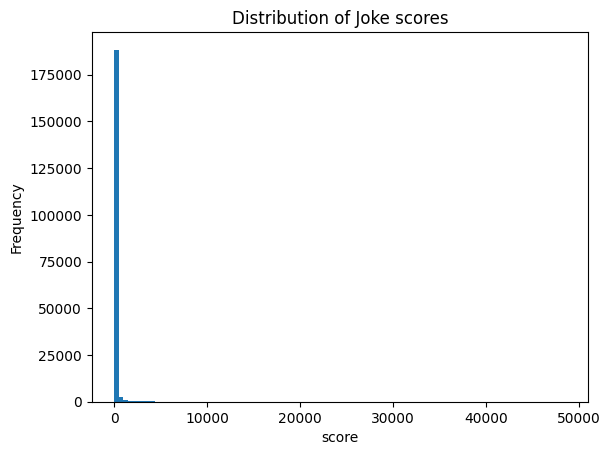

In [24]:
# plot the distribution of scores
scores = df['score']
plt.hist(scores, bins=100)
plt.xlabel('score')
plt.ylabel('Frequency')
plt.title('Distribution of Joke scores')
plt.show()

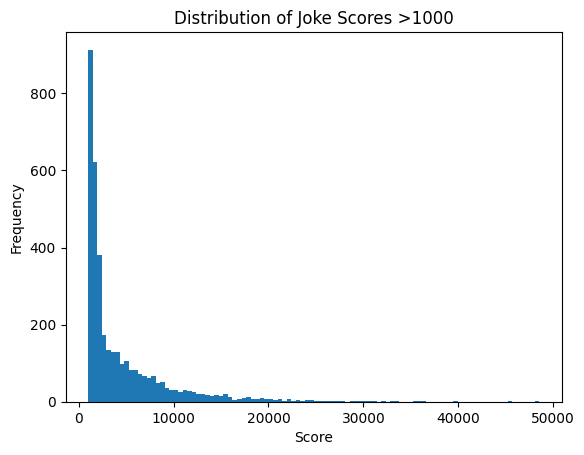

Number of jokes with score > 1000: 3699


In [25]:
min_score = 1000

# plot the distribution of scores
scores = df[df['score'] > min_score]['score']
plt.hist(scores, bins=100)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title(f'Distribution of Joke Scores >{min_score}')
plt.show()

# print number of jokes with score > 1000
num_jokes = len(scores)
print(f'Number of jokes with score > {min_score}:', num_jokes)